#  **A. Daily attendance of bike tracks**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Read 

In [2]:
path=r"code\data\bikes.csv"
df=pd.read_csv(path)


### 2. Check head 

In [3]:
df.head()

,Date,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
0,01/01/2013,00:00,0,0,1,0,6,0,1,0
1,02/01/2013,00:00,69,0,13,0,18,0,2,0
2,03/01/2013,00:00,69,2,21,6,22,1,0,0
3,04/01/2013,00:00,80,0,22,4,16,0,125,0
4,05/01/2013,00:00,52,4,19,3,12,0,97,0


### 3. Check summary statistics 

In [4]:
df.describe()

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2743.390805,1221.858238,1757.590038,3224.130268,1669.425287,1152.885057,3084.425287,1858.793103
std,2247.957848,1070.037364,1458.793882,2589.514354,1363.738862,1208.848429,2380.255540,1434.899574
min,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000
25%,392.000000,12.000000,236.000000,516.000000,222.000000,12.000000,451.000000,340.000000
50%,2771.000000,1184.000000,1706.000000,3178.000000,1584.000000,818.000000,3111.000000,2087.000000
75%,4767.000000,2168.000000,3158.000000,5812.000000,3068.000000,2104.000000,5338.000000,3168.000000
max,6803.000000,3330.000000,4716.000000,7684.000000,4103.000000,4841.000000,8555.000000,4293.000000


### 4. plot the daily attendance of two tracks, 'Berri1', 'PierDup'

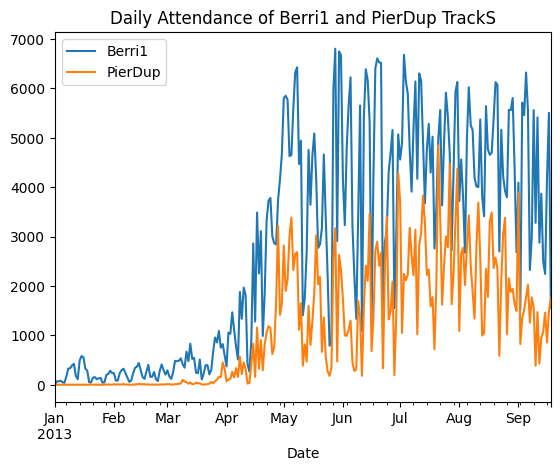

In [40]:
df[['Berri1', 'PierDup']].plot(title="Daily Attendance of Berri1 and PierDup TrackS")
plt.show()

### 5. Check index , explore weekday_name attributes 

In [6]:
"Index Type:", type(df.index)

('Index Type:', pandas.core.indexes.range.RangeIndex)

In [7]:
"Index Sample:", df.index[:5]

('Index Sample:', RangeIndex(start=0, stop=5, step=1))

In [8]:
#  Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [9]:
df.set_index('Date', inplace=True)

In [10]:
df.drop('Unnamed: 1', axis=1, inplace=True)

In [11]:
df['weekday'] = df.index.day_name()

In [12]:
df[['Berri1', 'PierDup', 'weekday']].head()

,Berri1,PierDup,weekday
Date,,,
2013-01-01,0,0,Tuesday
2013-01-02,69,0,Wednesday
2013-01-03,69,1,Thursday
2013-01-04,80,0,Friday
2013-01-05,52,0,Saturday


### 6. Get sum of all attendance as a function of the weekday

In [13]:
weekday_totals = df.groupby('weekday').sum()
weekday_totals

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
weekday,,,,,,,,
Friday,105701,44252,71605,127526,64385,36850,118556,71426
Monday,106826,51646,68087,129982,69767,44500,119211,72883
Saturday,75754,27226,45947,79743,35544,46149,97143,56438
Sunday,74873,29181,40812,75746,37620,53812,100735,53798
Thursday,115193,52340,76273,141424,73668,36349,120684,74540
Tuesday,117244,54656,76974,141217,74299,40679,123533,76559
Wednesday,120434,59604,79033,145860,80437,42564,125173,79501


In [14]:
attendance_by_weekday = weekday_totals.sum(axis=1)
attendance_by_weekday

weekday
Friday       640301
Monday       662902
Saturday     463944
Sunday       466577
Thursday     690471
Tuesday      705161
Wednesday    732606
dtype: int64

In [15]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
attendance_by_weekday = attendance_by_weekday.reindex(weekday_order)

In [16]:
attendance_by_weekday

weekday
Monday       662902
Tuesday      705161
Wednesday    732606
Thursday     690471
Friday       640301
Saturday     463944
Sunday       466577
dtype: int64

### 7. Display this in figure , what is the inference?

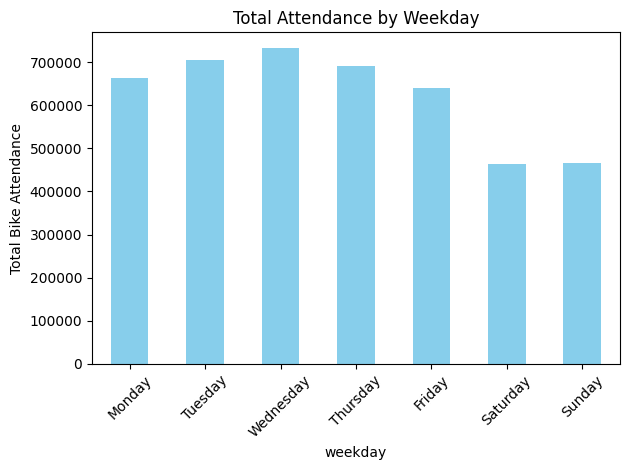

In [17]:
attendance_by_weekday.plot(kind='bar', title='Total Attendance by Weekday', color='skyblue')
plt.ylabel("Total Bike Attendance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# B. Titanic

### 1. Load the data

In [18]:
path=r'code\data\titanic_train.csv'
titanic = pd.read_csv(path)

In [19]:
titanic

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 2. Which gender survived more

In [20]:
survival_more= titanic.groupby('sex')['survived'].sum()
survival_more

sex
female    233
male      109
Name: survived, dtype: int64

In [21]:
survival_more.idxmax(),survival_more.max()

('female', 233)

In [22]:
gender_total = titanic['sex'].value_counts()

In [23]:
gender_total

sex
male      577
female    314
Name: count, dtype: int64

### 3. Does it depend on pclass?

In [24]:
pclass_survival = titanic.groupby('pclass')['survived'].mean().round(2)

In [25]:
pclass_survival

pclass
1    0.63
2    0.47
3    0.24
Name: survived, dtype: float64

### 4. can we see % of survival of each gender and pclass What is your inference? 

In [26]:
combo = titanic.groupby(['pclass', 'sex'])['survived'].mean().unstack().round(2)
print("\nSurvival Rate by Pclass & Gender:")
combo


Survival Rate by Pclass & Gender:


sex,female,male
pclass,,
1,0.97,0.37
2,0.92,0.16
3,0.50,0.14


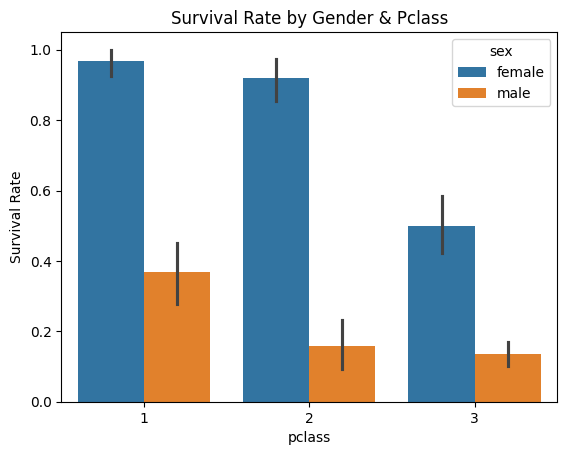

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='pclass', y='survived', hue='sex', data=titanic)
plt.title("Survival Rate by Gender & Pclass")
plt.ylabel("Survival Rate")
plt.show()


# C. Roger Federer database 

### 1. Read and check data 

In [28]:
path=r'code\data\federer.csv'
roger=pd.read_csv(path)

In [29]:
roger.head()

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 2nd serve return points total,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total
0,1998,"Basel, Switzerland",05.10.1998,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,...,22.0,4.0,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0
1,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,...,19.0,0.0,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0
2,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,...,30.0,0.0,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0
3,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",Q,...,28.0,3.0,10.0,10.0,44.0,63.0,26.0,67.0,70.0,130.0
4,1998,"Geneva, Switzerland",24.08.1998,CH,Outdoor: Clay,Draw: 32,1,680.0,$520,R32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2. How many % of matched won by our player? ('winner')

In [30]:
# Assuming 'winner' column contains names and 'our_player' is a string
our_player = 'Roger Federer'  # example
matches_won = roger[roger['winner'] == our_player].shape[0]
total_matches = roger.shape[0]

win_percentage = (matches_won / total_matches) * 100
print(f"Win % by {our_player}: {win_percentage:.2f}%")

Win % by Roger Federer: 82.44%


In [31]:
total_matches,matches_won

(1179, 972)

In [32]:
roger.winner

0             Andre Agassi
1            Roger Federer
2            Roger Federer
3            Jan Siemerink
4        Orlin Stanoytchev
               ...        
1174          Rafael Nadal
1175         Roger Federer
1176         Roger Federer
1177         Roger Federer
1178    Jo-Wilfried Tsonga
Name: winner, Length: 1179, dtype: object

### 3. Proportion of double faults wrt total points in each match 

In [33]:
roger['double_fault_ratio'] = roger['player1 double faults'] / roger['player1 total points total']

# Display simple stats
print(roger['double_fault_ratio'].describe())

count    1027.000000
mean        0.012129
std         0.010797
min         0.000000
25%         0.004444
50%         0.010000
75%         0.018108
max         0.060606
Name: double_fault_ratio, dtype: float64


In [34]:
wins_by_surface = roger[roger['winner'] == our_player].groupby('surface').size()
total_by_surface = roger.groupby('surface').size()

win_rate_per_surface = (wins_by_surface / total_by_surface) * 100
print(win_rate_per_surface)

surface
Indoor: Carpet    73.684211
Indoor: Clay      83.333333
Indoor: Hard      83.628319
Outdoor: Clay     77.911647
Outdoor: Grass    87.142857
Outdoor: Hard     84.232365
dtype: float64


In [35]:
roger['start date'] = pd.to_datetime(roger['start date'], dayfirst=True, errors='coerce')

In [36]:
roger['year'] = roger['start date'].dt.year

avg_df_per_year = roger.groupby('year')['player1 double faults'].mean()

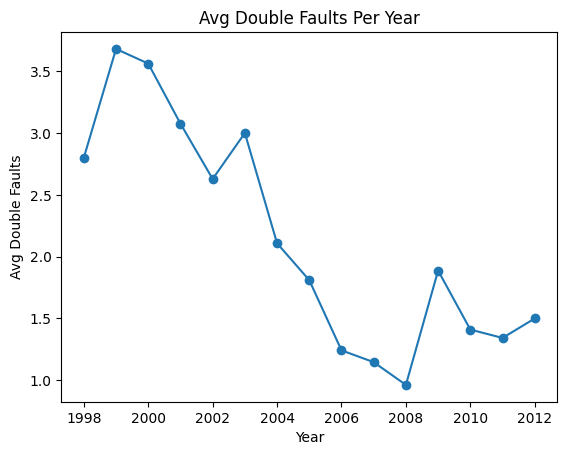

In [37]:
avg_df_per_year.plot(kind='line', marker='o', title="Avg Double Faults Per Year")
plt.xlabel("Year")
plt.ylabel("Avg Double Faults")
plt.show()

# D: Create two sine signals (5Hz and 50Hz), and draw their FFT components.

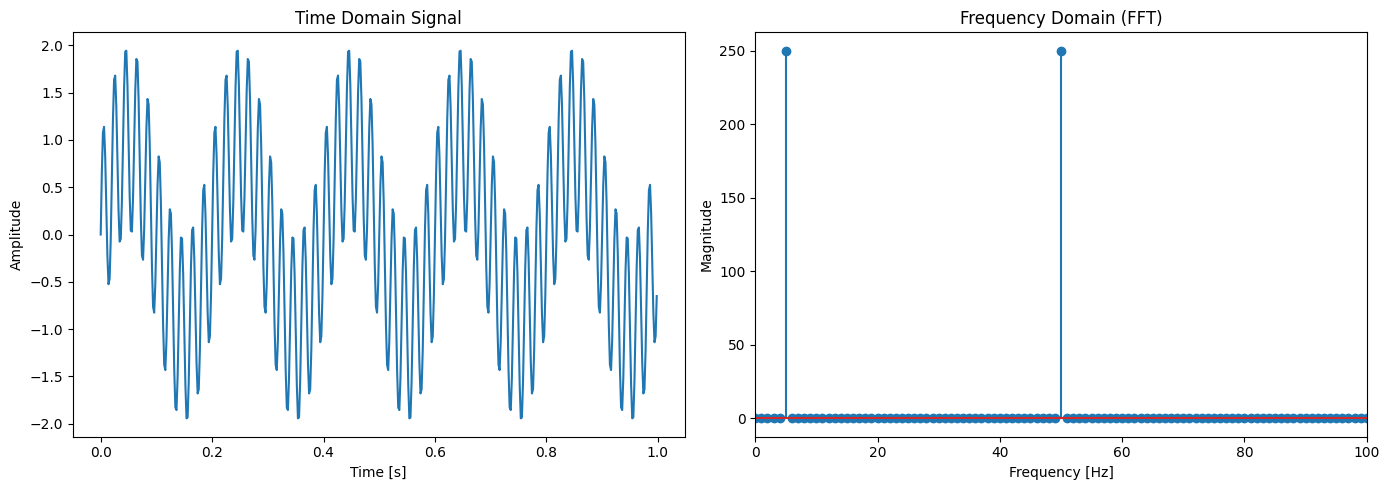

In [38]:
# Settings
Fs = 500  # Sampling frequency (samples per second)
T = 1     # Duration (seconds)
t = np.linspace(0, T, int(Fs * T), endpoint=False)

# Generate sine waves
signal_5Hz = np.sin(2 * np.pi * 5 * t)
signal_50Hz = np.sin(2 * np.pi * 50 * t)

# Combine signals
combined_signal = signal_5Hz + signal_50Hz

# FFT
fft_vals = np.fft.fft(combined_signal)
fft_freqs = np.fft.fftfreq(len(fft_vals), 1 / Fs)

# Only take positive frequencies
pos_mask = fft_freqs >= 0
fft_vals = np.abs(fft_vals[pos_mask])
fft_freqs = fft_freqs[pos_mask]

plt.figure(figsize=(14, 5))   # Plotting

# Time-domain plot
plt.subplot(1, 2, 1)
plt.plot(t, combined_signal)
plt.title("Time Domain Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

# Frequency-domain plot
plt.subplot(1, 2, 2)
plt.stem(fft_freqs, fft_vals)
plt.title("Frequency Domain (FFT)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.xlim(0, 100)
plt.tight_layout()
plt.show()


# E: Gaussian distributions and their sums.

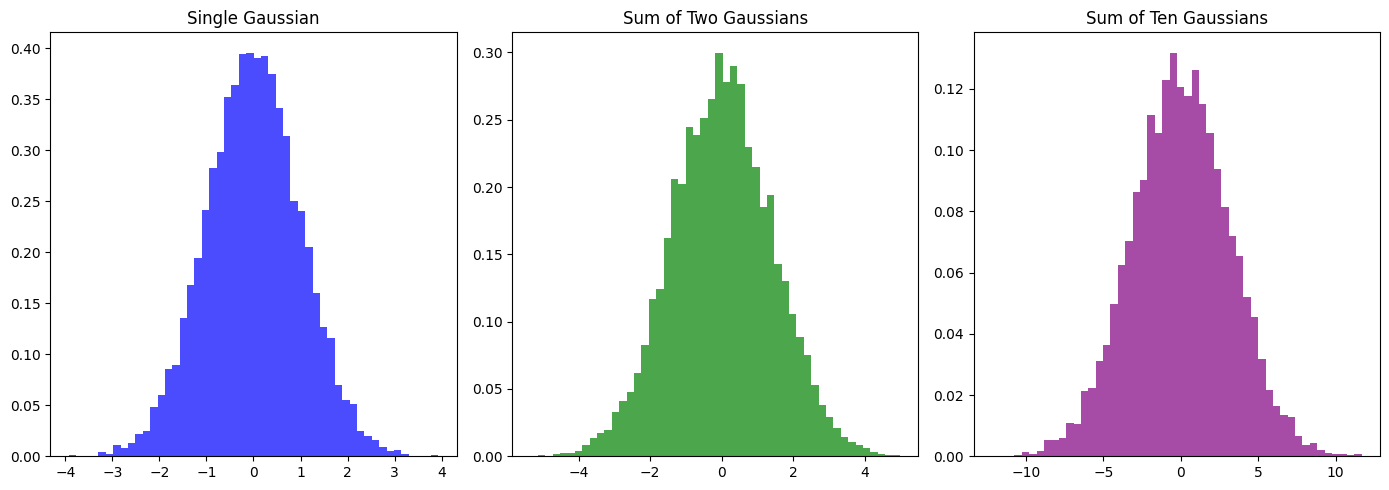

In [39]:
np.random.seed(42)  # Set seed for reproducibility
N = 10000      # Generate N samples from a standard normal distribution
gauss1 = np.random.normal(loc=0, scale=1, size=N)
gauss2 = np.random.normal(loc=0, scale=1, size=N)

# Sum of two Gaussians
sum_two = gauss1 + gauss2

# Sum of ten Gaussians
sum_many = np.sum([np.random.normal(0, 1, N) for _ in range(10)], axis=0)

plt.figure(figsize=(14, 5))  # Plotting

# Original Gaussians
plt.subplot(1, 3, 1)
plt.hist(gauss1, bins=50, alpha=0.7, color='blue', density=True)
plt.title("Single Gaussian")

# Sum of Two
plt.subplot(1, 3, 2)
plt.hist(sum_two, bins=50, alpha=0.7, color='green', density=True)
plt.title("Sum of Two Gaussians")

# Sum of Many
plt.subplot(1, 3, 3)
plt.hist(sum_many, bins=50, alpha=0.7, color='purple', density=True)
plt.title("Sum of Ten Gaussians")

plt.tight_layout()
plt.show()